In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.impute import KNNImputer

/Users/danielzellner/Documents/Studium/Bachelorthesis/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_neutor = pd.read_pickle("/Users/danielzellner/Documents/Studium/Bachelorthesis/src/verkehr_data/df_neutor.pkl")
df_neutor = pd.DataFrame(df_neutor)

In [5]:
print(df_neutor.isna().sum())

Datum                         0
Zeit                          0
Wochentag                     0
Neutor (gesamt)            1259
Neutor FR stadteinwärts    1288
Neutor FR stadtauswärts    2811
Wetter                        0
Temperatur (°C)               3
Luftfeuchtigkeit (%)          3
Regen (mm)                    3
Wind (km/h)                   3
Feiertag                      0
Semesterferien                0
Ferien                        0
Lockdown                      0
dtype: int64


In [250]:
df_neutor

,Datum,Zeit,Wochentag,Neutor (gesamt),Neutor FR stadteinwärts,Neutor FR stadtauswärts,Wetter,Temperatur (°C),Luftfeuchtigkeit (%),Regen (mm),Wind (km/h),Feiertag,Semesterferien,Ferien,Lockdown
0,2018-01-01,00:00:00,Monday,71.0,26.0,45.0,Leichter Regenfall,10.0,83.0,1.0,26.0,1,1,1,0
1,2018-01-01,01:00:00,Monday,67.0,35.0,32.0,Leichter Regenfall,9.0,81.0,1.0,27.0,1,1,1,0
2,2018-01-01,02:00:00,Monday,123.0,53.0,70.0,Mäßiger Regenfall,9.0,79.0,1.0,29.0,1,1,1,0
3,2018-01-01,03:00:00,Monday,171.0,64.0,107.0,Mäßiger Regenfall,8.0,77.0,0.0,31.0,1,1,1,0
4,2018-01-01,04:00:00,Monday,102.0,26.0,76.0,Mäßiger Regenfall,8.0,75.0,0.0,32.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43814,2022-12-31,18:00:00,Saturday,365.0,173.0,192.0,Bewölkt,16.0,72.0,0.0,38.0,0,1,1,0
43815,2022-12-31,19:00:00,Saturday,303.0,164.0,139.0,Bewölkt,16.0,70.0,0.0,37.0,0,1,1,0
43816,2022-12-31,20:00:00,Saturday,207.0,102.0,105.0,Leicht bewölkt,16.0,69.0,0.0,36.0,0,1,1,0
43817,2022-12-31,21:00:00,Saturday,149.0,83.0,66.0,Leicht bewölkt,15.0,67.0,0.0,36.0,0,1,1,0


In [114]:
def missing_values_table(df):

        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Summe fehlender Werte', 1 : '% von Gesamt'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% von Gesamt', ascending=False).round(1)
        
        return mis_val_table_ren_columns

In [115]:
df_prophet = df_neutor[['Datum', 'Neutor (gesamt)']].copy()
df_prophet.columns = ['ds', 'y']
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

model = Prophet()

model.fit(df_prophet)

future = model.make_future_dataframe(periods=0)

forecast = model.predict(future)

filled_data_pro = forecast[['ds', 'yhat']]
filled_data_pro['ds'] = pd.to_datetime(filled_data_pro['ds'])

df_neutor_filled_pro = pd.merge(df_neutor, filled_data_pro, left_on='Datum', right_on='ds', how='left')

df_neutor_filled_pro['Neutor (gesamt)'] = df_neutor_filled_pro['Neutor (gesamt)'].fillna(df_neutor_filled_pro['yhat'])

df_neutor_filled_pro.drop(columns=['ds', 'yhat'], inplace=True)

16:35:20 - cmdstanpy - INFO - Chain [1] start processing
16:35:28 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/hz/2fntg1q133z6s0ff1j1vhkgm0000gn/T/ipykernel_1490/2461985870.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_data_pro['ds'] = pd.to_datetime(filled_data_pro['ds'])


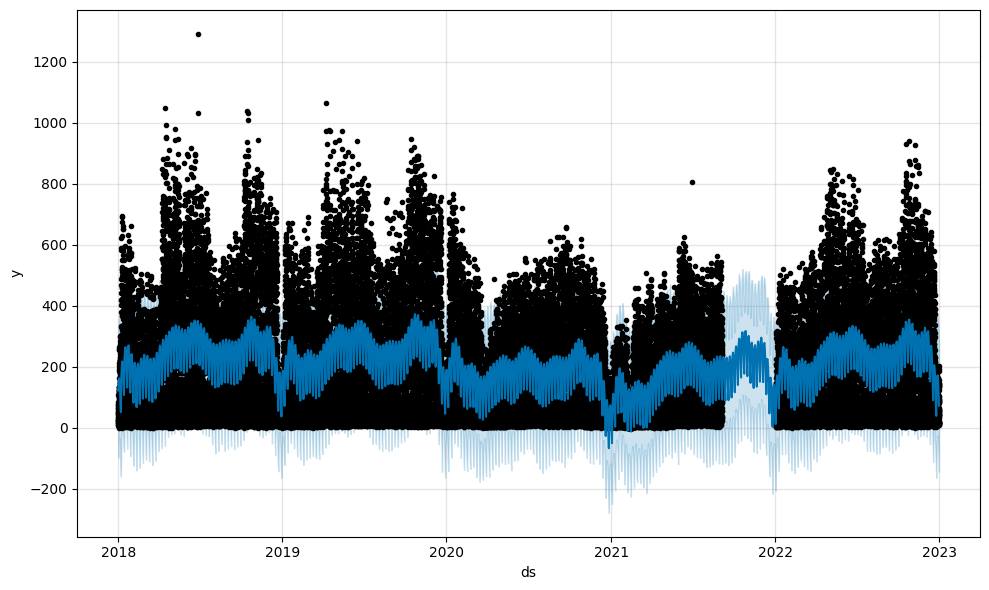

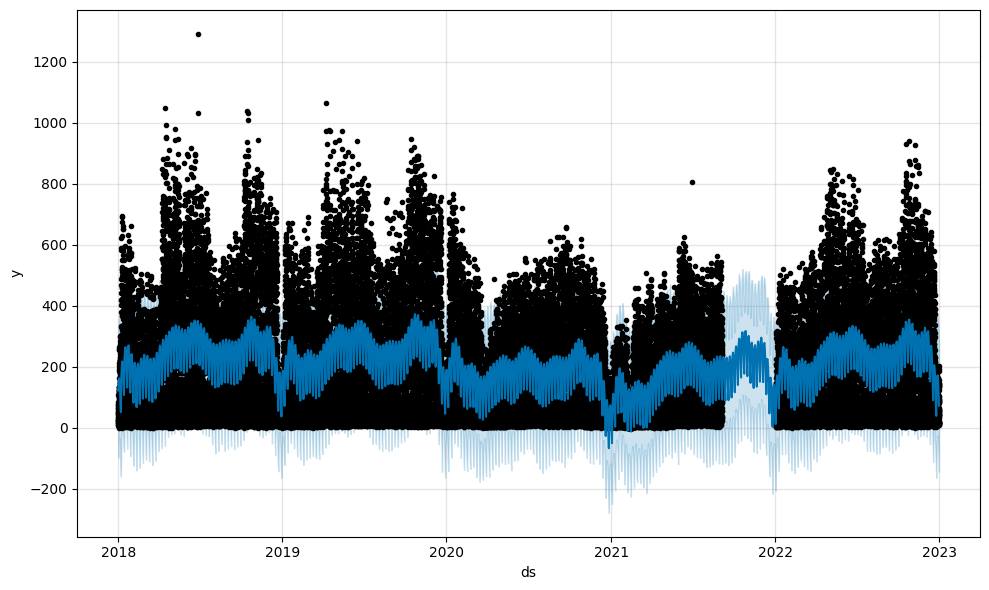

In [170]:
model.plot(forecast)

In [171]:
missing_values = missing_values_table(df_neutor)
missing_values

,Summe fehlender Werte,% von Gesamt


### Verschiedene Modelle testen

In [137]:
window_size = 1200

# Linear Interpolation
interpolated = df_neutor['Neutor (gesamt)'].interpolate(method='linear')
df_neutor_filled_lin = df_neutor.copy()
df_neutor_filled_lin['Neutor (gesamt)'] = interpolated

# Moving Average
df_neutor_filled_mov = df_neutor.copy()
missing_indices = df_neutor_filled_mov['Neutor (gesamt)'].isna()
ma_filled = df_neutor_filled_lin['Neutor (gesamt)'].rolling(window=window_size, min_periods=1).mean()
df_neutor_filled_mov.loc[missing_indices, 'Neutor (gesamt)'] = ma_filled.loc[missing_indices]

# Rolling Median
df_neutor_filled_rol = df_neutor.copy()
median_filled = df_neutor_filled_lin['Neutor (gesamt)'].rolling(window=window_size, min_periods=1).median()
df_neutor_filled_rol.loc[missing_indices, 'Neutor (gesamt)'] = median_filled.loc[missing_indices]

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
knn_filled = df_neutor.copy()
knn_filled['Neutor (gesamt)'] = knn_imputer.fit_transform(df_neutor[['Neutor (gesamt)']])


In [241]:
missing_values = missing_values_table(df_neutor_filled_mov)
missing_values

,Summe fehlender Werte,% von Gesamt


In [138]:
df_group_date_original = df_neutor.groupby('Datum').agg({'Neutor (gesamt)': 'sum'}).reset_index()
df_group_date_filled_pro = df_neutor_filled_pro.groupby('Datum').agg({'Neutor (gesamt)': 'sum'}).reset_index()
df_group_date_linear = df_neutor_filled_lin.groupby('Datum').agg({'Neutor (gesamt)': 'sum'}).reset_index()
df_group_date_mov = df_neutor_filled_mov.groupby('Datum').agg({'Neutor (gesamt)': 'sum'}).reset_index()
df_group_date_rol = df_neutor_filled_rol.groupby('Datum').agg({'Neutor (gesamt)': 'sum'}).reset_index()
df_group_date_knn = knn_filled.groupby('Datum').agg({'Neutor (gesamt)': 'sum'}).reset_index()

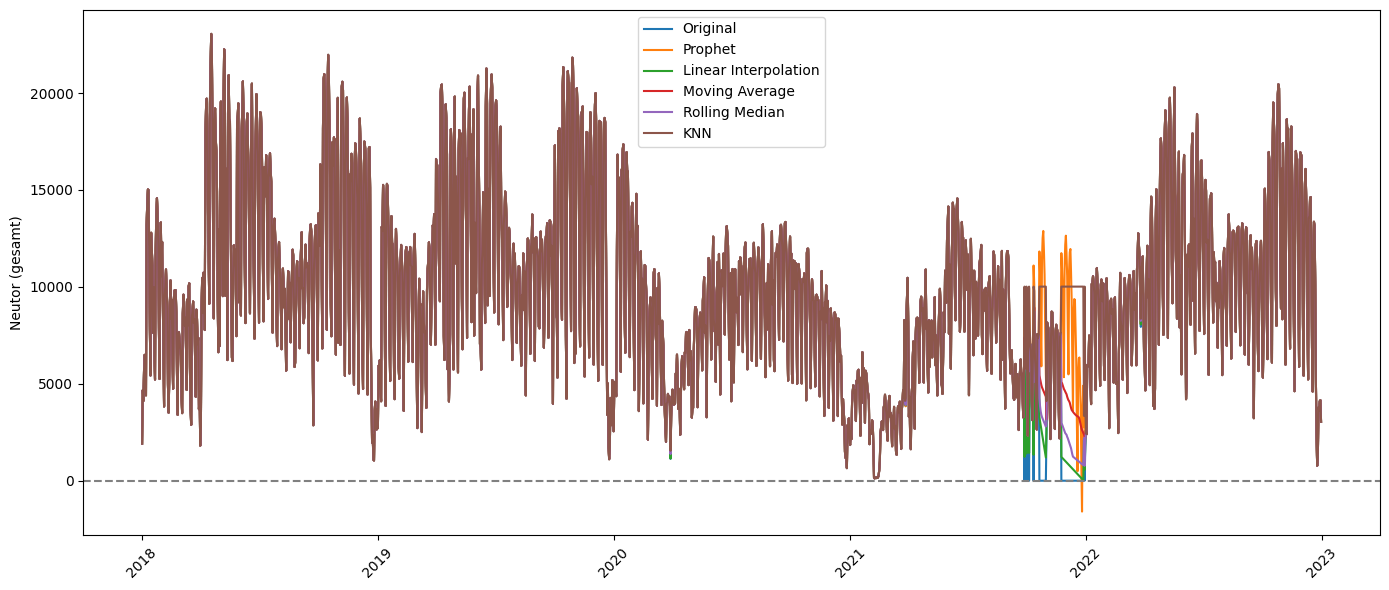

In [139]:
plt.figure(figsize=(14, 6))
plt.plot(df_group_date_original['Datum'], df_group_date_original['Neutor (gesamt)'], label='Original')
plt.plot(df_group_date_filled_pro['Datum'], df_group_date_filled_pro['Neutor (gesamt)'], label='Prophet')
plt.plot(df_group_date_linear['Datum'], df_group_date_linear['Neutor (gesamt)'], label='Linear Interpolation')
plt.plot(df_group_date_mov['Datum'], df_group_date_mov['Neutor (gesamt)'], label='Moving Average')
plt.plot(df_group_date_rol['Datum'], df_group_date_rol['Neutor (gesamt)'], label='Rolling Median')
plt.plot(df_group_date_knn['Datum'], df_group_date_knn['Neutor (gesamt)'], label='KNN')
plt.axhline(y=0, linestyle='dashed', color='gray')
plt.xticks(rotation=45)
plt.ylabel('Neutor (gesamt)')
plt.legend()
plt.tight_layout()
plt.show()

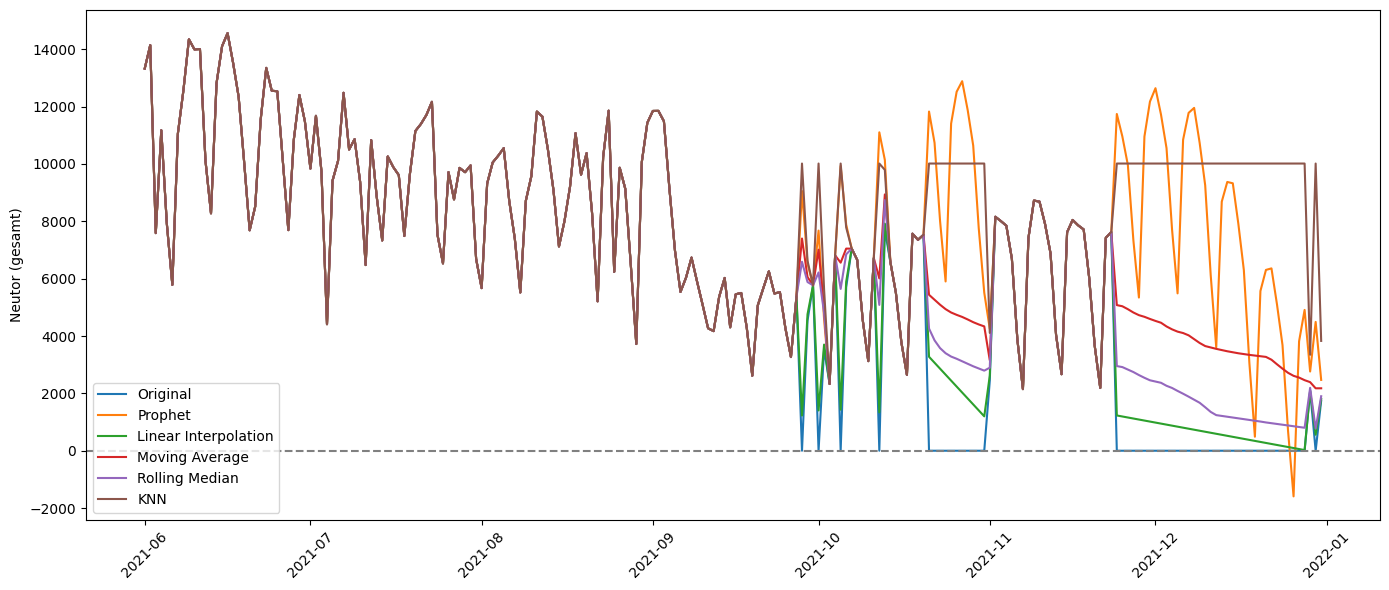

In [140]:
start_date = '2021-06-01'
end_date = '2021-12-31'

dfs = [df_group_date_original, df_group_date_filled_pro, df_group_date_linear, df_group_date_mov, df_group_date_rol, df_group_date_knn]

filtered_dfs = []
for df in dfs:
    df['Datum'] = pd.to_datetime(df['Datum'])
    mask = (df['Datum'] >= start_date) & (df['Datum'] <= end_date)
    filtered_dfs.append(df.loc[mask])

df_group_date_original, df_group_date_filled_pro, df_group_date_linear, df_group_date_mov, df_group_date_rol, df_group_date_knn = filtered_dfs

    
plt.figure(figsize=(14, 6))
plt.plot(df_group_date_original['Datum'], df_group_date_original['Neutor (gesamt)'], label='Original')
plt.plot(df_group_date_filled_pro['Datum'], df_group_date_filled_pro['Neutor (gesamt)'], label='Prophet')
plt.plot(df_group_date_linear['Datum'], df_group_date_linear['Neutor (gesamt)'], label='Linear Interpolation')
plt.plot(df_group_date_mov['Datum'], df_group_date_mov['Neutor (gesamt)'], label='Moving Average')
plt.plot(df_group_date_rol['Datum'], df_group_date_rol['Neutor (gesamt)'], label='Rolling Median')
plt.plot(df_group_date_knn['Datum'], df_group_date_knn['Neutor (gesamt)'], label='KNN')
plt.axhline(y=0, linestyle='dashed', color='gray')
plt.xticks(rotation=45)
plt.ylabel('Neutor (gesamt)')
plt.legend()
plt.tight_layout()
plt.show()

# Entgültige Lösung Prophet

Prophet soll nur Spalten auffüllen, die mehr als 100 fehlende Werte haben, da dieser Ansatz rechenintensiv ist. Ansonsten wird der Mittelwert der Spalte verwendet.

In [236]:
numerical_columns = df_neutor.select_dtypes(include=['number', 'float']).columns
columns_over_zero = [column for column in numerical_columns if df_neutor[column].min() >= 0]

for column in df_neutor.columns:
    missing_count = df_neutor[column].isnull().sum()

    if missing_count > 0:
        if missing_count > 100:
            # Füllen mit Prophet
            df_prophet = df_neutor[['Datum', column]].copy()
            df_prophet.columns = ['ds', 'y']
            df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

            model = Prophet()
            model.fit(df_prophet)

            future = model.make_future_dataframe(periods=0)
            forecast = model.predict(future)

            filled_data_pro = forecast[['ds', 'yhat']]
            filled_data_pro['ds'] = pd.to_datetime(filled_data_pro['ds'])

            df_neutor_filled_pro = pd.merge(df_neutor, filled_data_pro, left_on='Datum', right_on='ds', how='left')

            df_neutor_filled_pro[column] = df_neutor_filled_pro[column].fillna(df_neutor_filled_pro['yhat'])

            df_neutor_filled_pro.drop(columns=['ds', 'yhat'], inplace=True)
            
            df_neutor[column] = df_neutor_filled_pro[column]
        else:
            # Füllen mit Mittelwert
            df_neutor[column] = df_neutor[column].fillna(df_neutor[column].mean())

for column in columns_over_zero:
    positive_mean = df_neutor[column].loc[df_neutor[column] >= 0].mean()
    negative_indices = df_neutor[df_neutor[column] < 0].index
    df_neutor.loc[negative_indices, column] = positive_mean

10:41:42 - cmdstanpy - INFO - Chain [1] start processing
10:41:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/hz/2fntg1q133z6s0ff1j1vhkgm0000gn/T/ipykernel_1490/4238184747.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_data_pro['ds'] = pd.to_datetime(filled_data_pro['ds'])
10:41:51 - cmdstanpy - INFO - Chain [1] start processing
10:41:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/hz/2fntg1q133z6s0ff1j1vhkgm0000gn/T/ipykernel_1490/4238184747.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

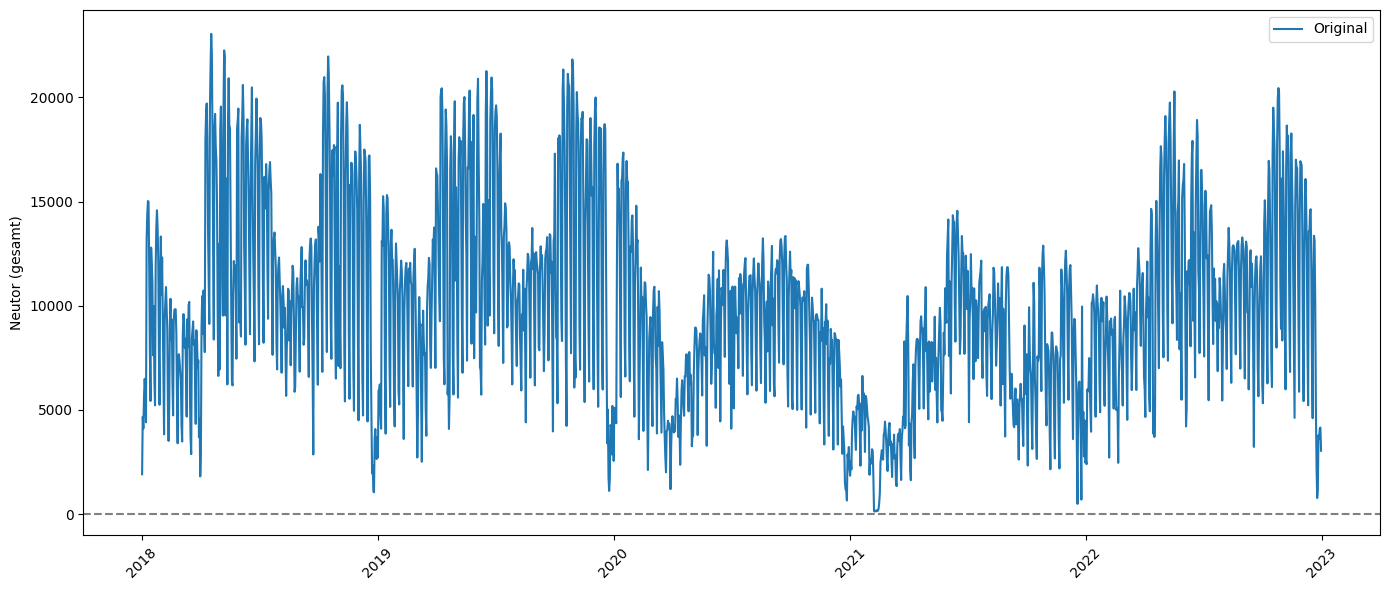

In [237]:
df_group_date_original = df_neutor.groupby('Datum').agg({'Neutor (gesamt)': 'sum'}).reset_index()

plt.figure(figsize=(14, 6))
plt.plot(df_group_date_original['Datum'], df_group_date_original['Neutor (gesamt)'], label='Original')
plt.axhline(y=0, linestyle='dashed', color='gray')
plt.xticks(rotation=45)
plt.ylabel('Neutor (gesamt)')
plt.legend()
plt.tight_layout()
plt.show()

In [238]:
df_neutor['Neutor (gesamt)'].nsmallest(100)

27047    0.0
27212    0.0
27213    0.0
27214    0.0
27215    0.0
        ... 
20352    2.0
23184    2.0
25776    2.0
25800    2.0
26040    2.0
Name: Neutor (gesamt), Length: 100, dtype: float64

In [256]:
df_neutor_com = pd.read_pickle("/Users/danielzellner/Documents/Studium/Bachelorthesis/src/verkehr_data/df_neutor_complete.pkl")
df_neutor_com = pd.DataFrame(df_neutor_com)
print(df_neutor_com.isnull().sum())

Datum                      0
Zeit                       0
Wochentag                  0
Neutor (gesamt)            0
Neutor FR stadteinwärts    0
Neutor FR stadtauswärts    0
Wetter                     0
Temperatur (°C)            0
Luftfeuchtigkeit (%)       0
Regen (mm)                 0
Wind (km/h)                0
Feiertag                   0
Semesterferien             0
Ferien                     0
Lockdown                   0
dtype: int64
